#### Pandas怎样快捷方便的处理日期数据
pandas日期处理的作用：将2018-01-01，1/1/2018等多种日期格式映射成统一的格式对象，在该对象上提供强大的功能支持

几个概念：
1. pd.to_datetime: pandas的一个函数，能将字符串，列表，series变成日期形式
2. Timestamp：pandas表示日期的对象形式
3. DatatimeIndex：pandas表示日期的对象列表形式

其中：
+ DatatimeIndex是Timestamp的列表形式
+ pd.to_datetime对单个日期字符串处理会得到Timestamp
+ pd.to_datetime对日期字符串列表处理会得到DatetimeIndex
+ DatetimeIndex是Timestamp的列表

#### 问题：怎样统计每周，每月，每季度的最高温度？

#### 1. 读取天气数据到dataframe

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
fpath='./files/austin_weather.csv'
df=pd.read_csv(fpath)
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

#### 2.将日期列转换成pandas的日期

In [5]:
df.set_index(pd.to_datetime(df['Date']),inplace=True)
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-21,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
2013-12-22,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2013-12-23,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
2013-12-24,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
2013-12-25,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [6]:
df.index

DatetimeIndex(['2013-12-21', '2013-12-22', '2013-12-23', '2013-12-24',
               '2013-12-25', '2013-12-26', '2013-12-27', '2013-12-28',
               '2013-12-29', '2013-12-30',
               ...
               '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
               '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', name='Date', length=1319, freq=None)

In [8]:
df.index[0]

Timestamp('2013-12-21 00:00:00')

#### 3、方便的对DatetimeIndex进行查询

In [10]:
# 筛选固定的某一天
df.loc['2013-12-21']

Date                                   2013-12-21
TempHighF                                      74
TempAvgF                                       60
TempLowF                                       45
DewPointHighF                                  67
DewPointAvgF                                   49
DewPointLowF                                   43
HumidityHighPercent                            93
HumidityAvgPercent                             75
HumidityLowPercent                             57
SeaLevelPressureHighInches                  29.86
SeaLevelPressureAvgInches                   29.68
SeaLevelPressureLowInches                   29.59
VisibilityHighMiles                            10
VisibilityAvgMiles                              7
VisibilityLowMiles                              2
WindHighMPH                                    20
WindAvgMPH                                      4
WindGustMPH                                    31
PrecipitationSumInches                       0.46


In [11]:
# 日期区间
df.loc['2013-12-21':'2013-12-25']

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-21,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
2013-12-22,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2013-12-23,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
2013-12-24,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
2013-12-25,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [12]:
# 按月份前缀筛选
df.loc['2013-12'].index

DatetimeIndex(['2013-12-21', '2013-12-22', '2013-12-23', '2013-12-24',
               '2013-12-25', '2013-12-26', '2013-12-27', '2013-12-28',
               '2013-12-29', '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [13]:
# 按月份前缀筛选
df.loc['2013-12':'2014-01'].index

DatetimeIndex(['2013-12-21', '2013-12-22', '2013-12-23', '2013-12-24',
               '2013-12-25', '2013-12-26', '2013-12-27', '2013-12-28',
               '2013-12-29', '2013-12-30', '2013-12-31', '2014-01-01',
               '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11', '2014-01-12', '2014-01-13',
               '2014-01-14', '2014-01-15', '2014-01-16', '2014-01-17',
               '2014-01-18', '2014-01-19', '2014-01-20', '2014-01-21',
               '2014-01-22', '2014-01-23', '2014-01-24', '2014-01-25',
               '2014-01-26', '2014-01-27', '2014-01-28', '2014-01-29',
               '2014-01-30', '2014-01-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

#### 4、方便的获取周，月，季度
Timestamp、DatetimeIndex支持大量的属性可以获取日期分量：

In [14]:
# 周数字列表
df.index.week

C:\Users\PXPXZ_~1\AppData\Local\Temp/ipykernel_9072/1005759598.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df.index.week


Int64Index([51, 51, 52, 52, 52, 52, 52, 52, 52,  1,
            ...
            29, 29, 30, 30, 30, 30, 30, 30, 30, 31],
           dtype='int64', name='Date', length=1319)

In [15]:
# 月数字列表
df.index.month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
           dtype='int64', name='Date', length=1319)

In [16]:
# 季度数字列表
df.index.quarter

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=1319)

#### 5.统计每周，每月，每个季度的最高温度

#### 统计每周的数据

In [23]:
df.groupby(df.index.week)['TempHighF'].max().head()

C:\Users\PXPXZ_~1\AppData\Local\Temp/ipykernel_9072/1706040323.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df.groupby(df.index.week)['TempHighF'].max().head()


Date
1    75
2    81
3    81
4    86
5    83
Name: TempHighF, dtype: int64

C:\Users\PXPXZ_~1\AppData\Local\Temp/ipykernel_9072/2108325996.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df.groupby(df.index.week)['TempHighF'].max().plot()


<AxesSubplot:xlabel='Date'>

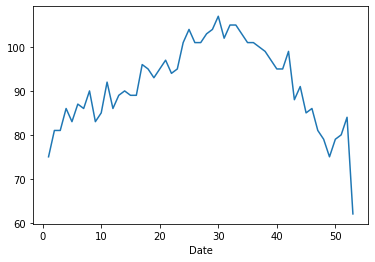

In [24]:
df.groupby(df.index.week)['TempHighF'].max().plot()

#### 统计每月的数据

In [25]:
df.groupby(df.index.month)['TempHighF'].max()

Date
1      86
2      90
3      92
4      96
5      97
6     104
7     107
8     105
9     101
10     99
11     91
12     84
Name: TempHighF, dtype: int64

<AxesSubplot:xlabel='Date'>

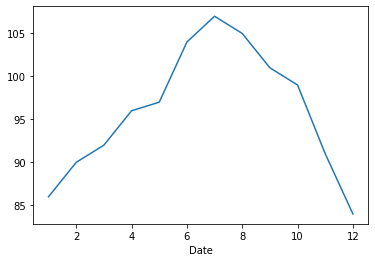

In [26]:
df.groupby(df.index.month)['TempHighF'].max().plot()

#### 统计每季度的数据

In [27]:
df.groupby(df.index.quarter)['TempHighF'].max()

Date
1     92
2    104
3    107
4     99
Name: TempHighF, dtype: int64

<AxesSubplot:xlabel='Date'>

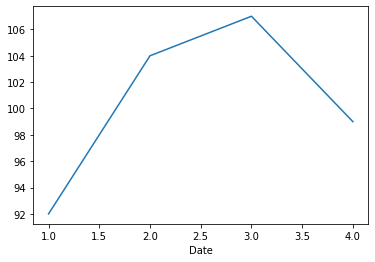

In [28]:
df.groupby(df.index.quarter)['TempHighF'].max().plot()